In [1]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.decomposition import PCA

In [61]:
## warning
import warnings
warnings.filterwarnings('ignore')

In [37]:
## load our data
data = pd.read_csv('winequality_white.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [39]:
## check for missing values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [40]:
##statistical Analysis
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


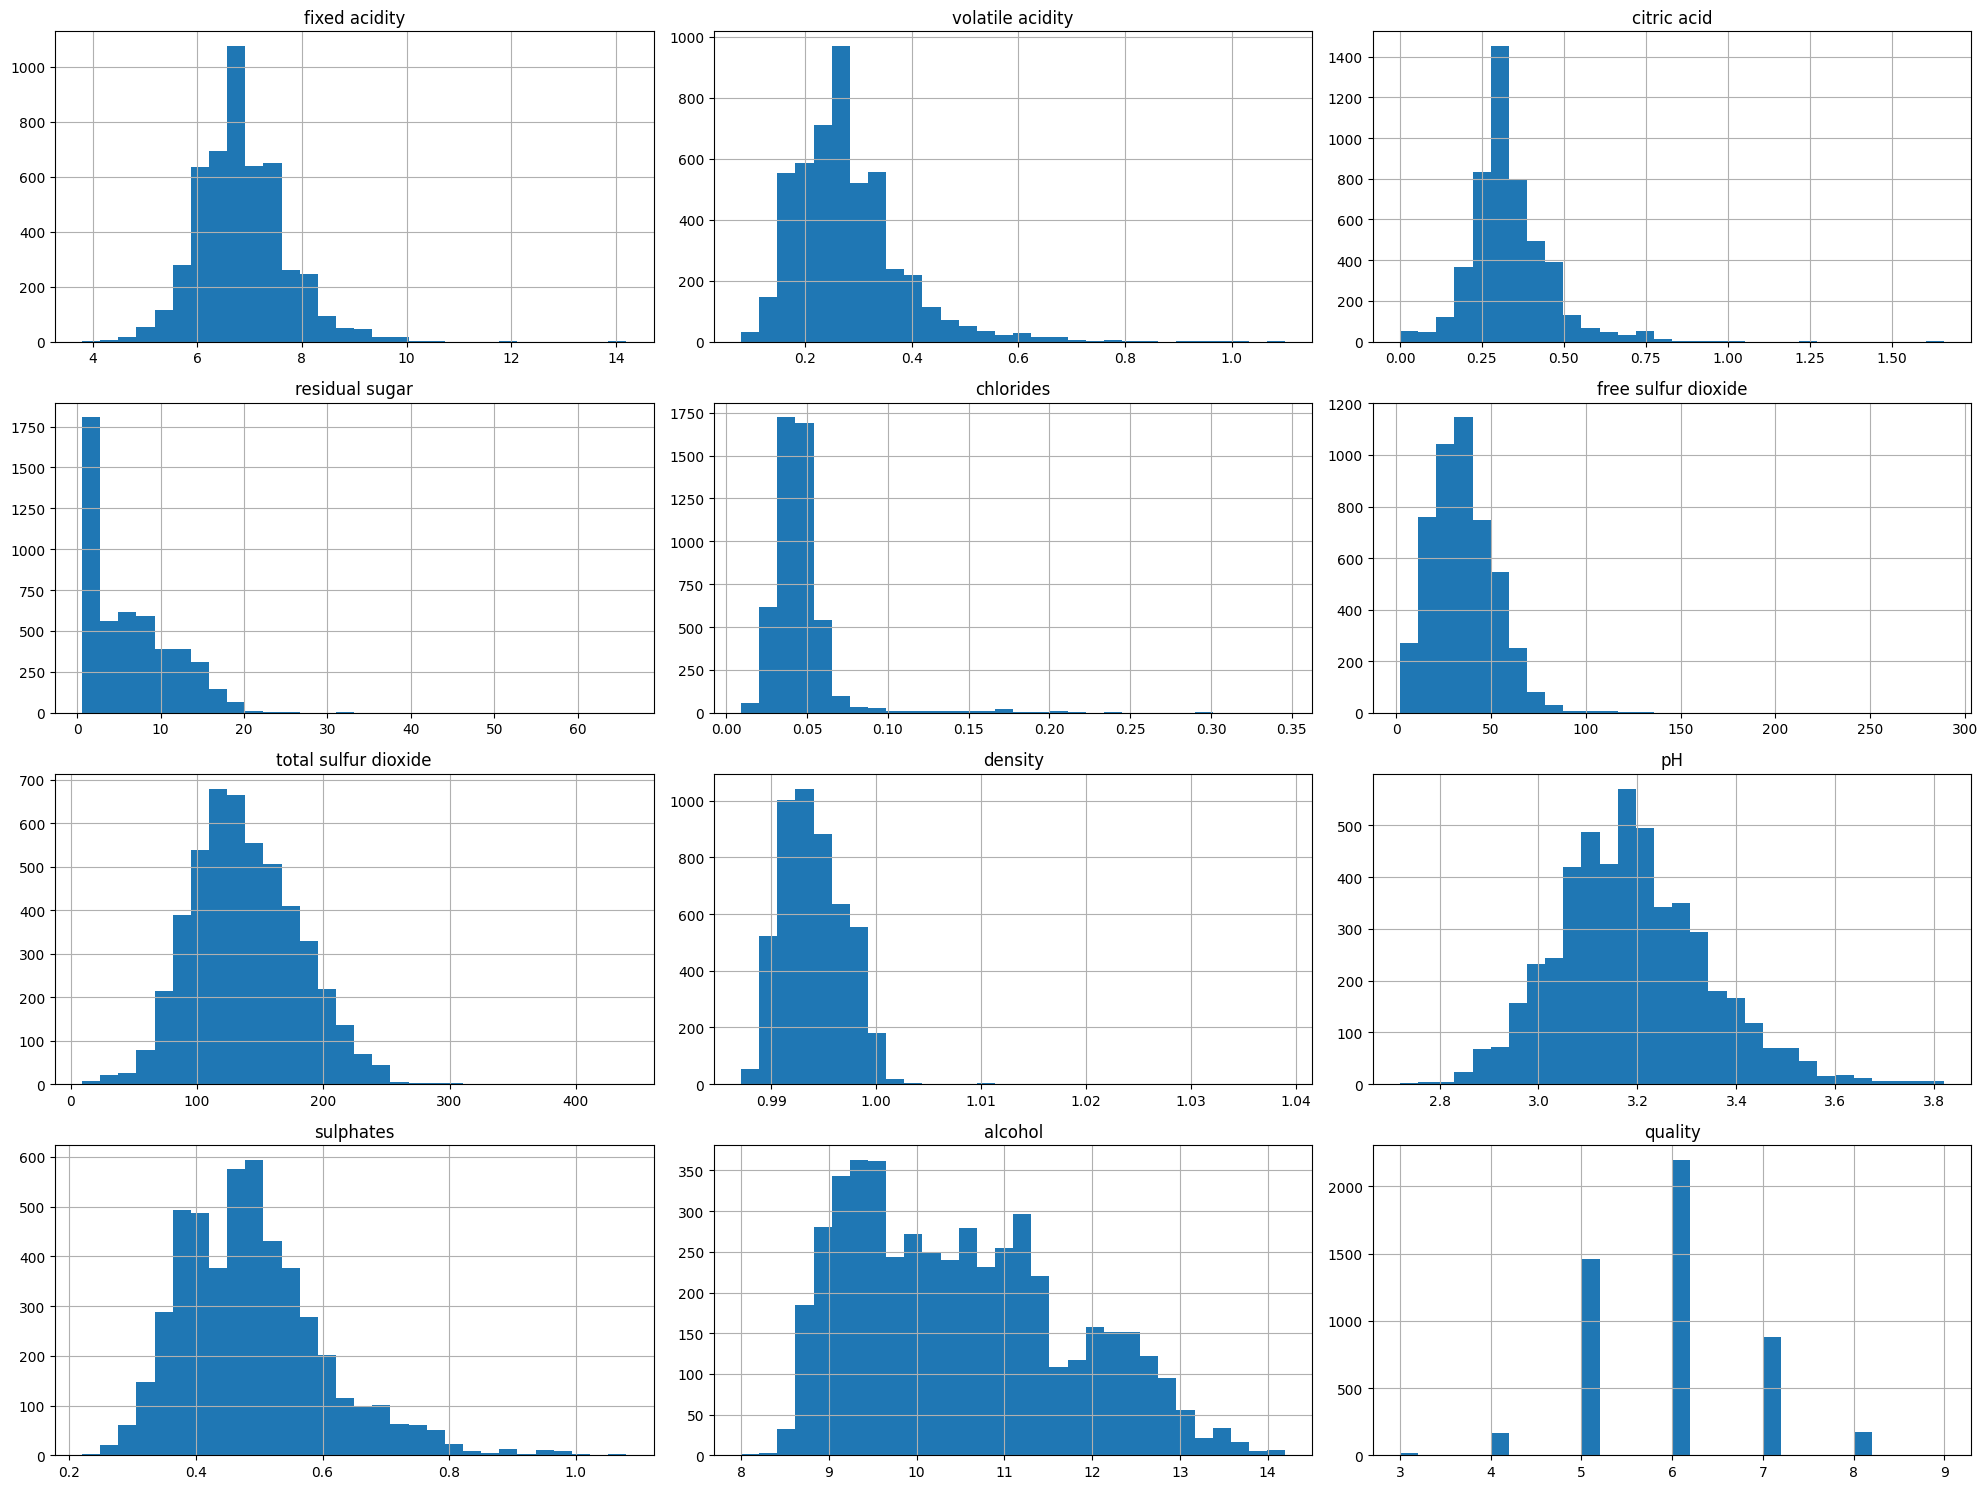

In [41]:
# Plot histograms of each feature
data.hist(bins=30, figsize=(20,15))
plt.tight_layout()
plt.show()


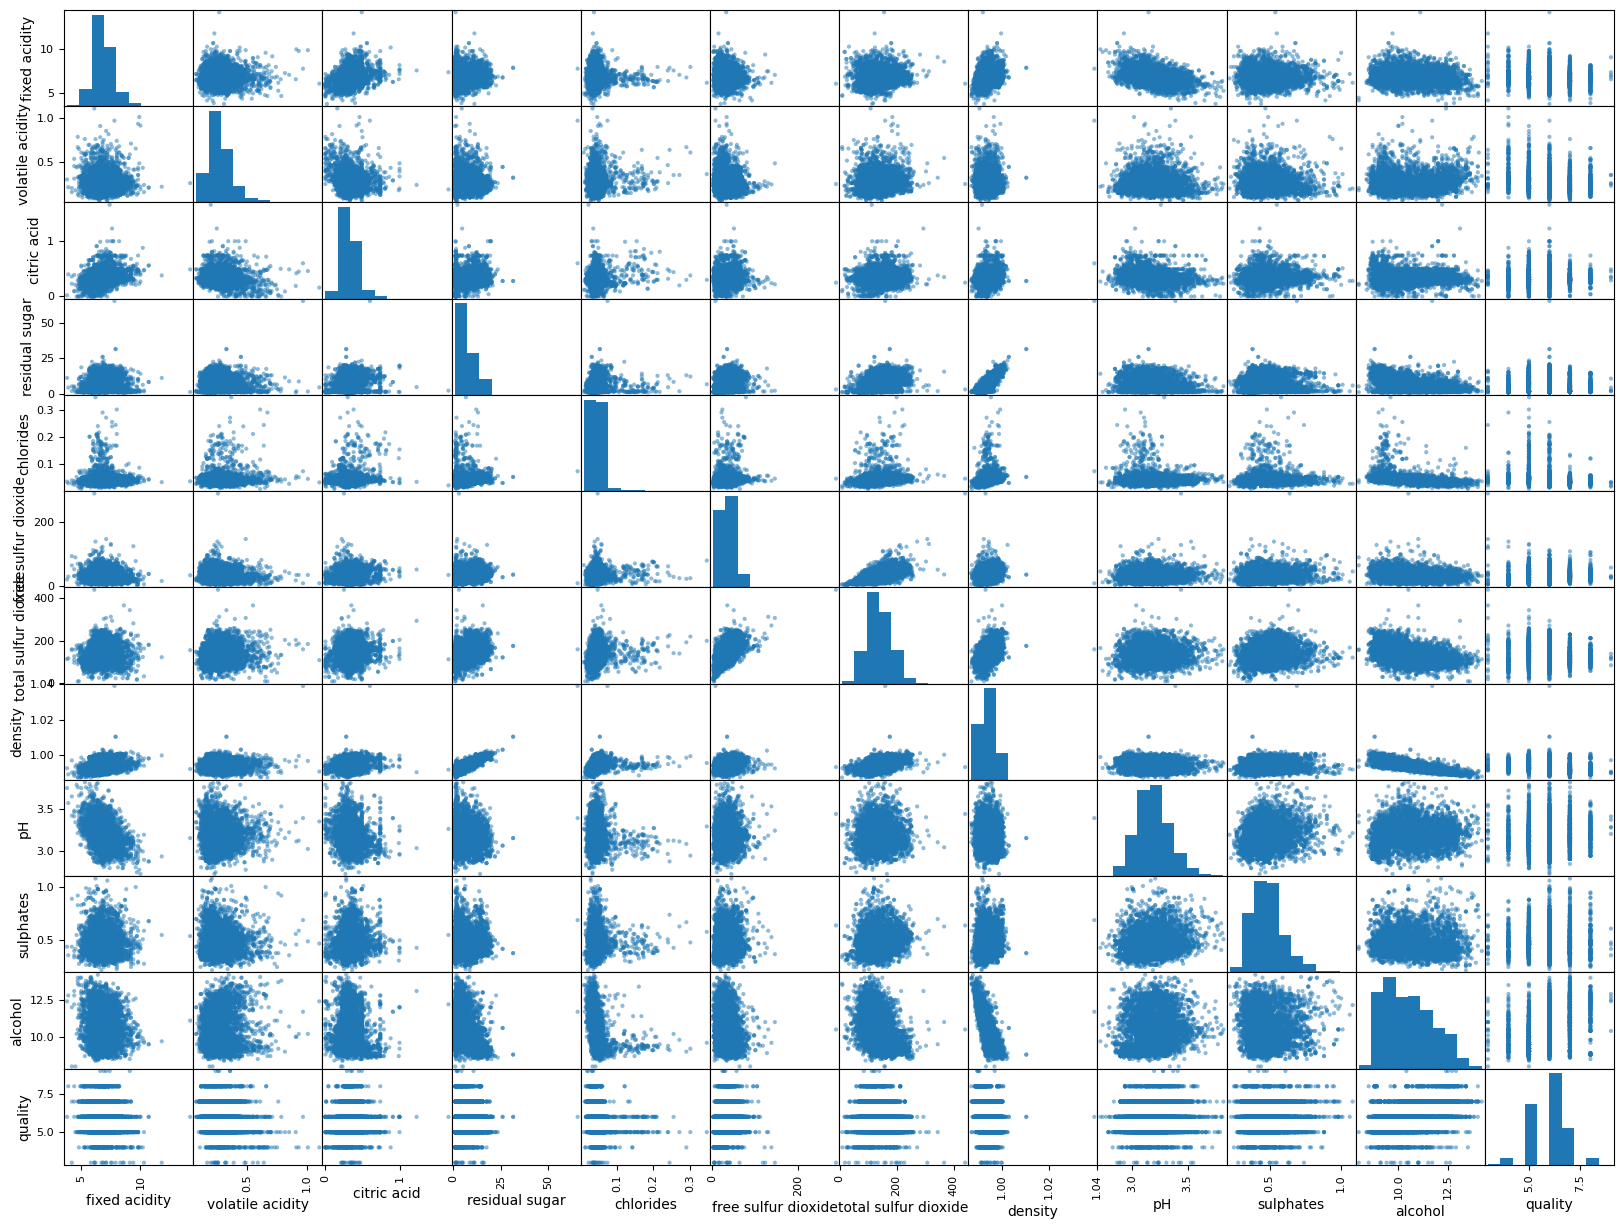

In [42]:
# Plot scatter matrix of all features
pd.plotting.scatter_matrix(data, figsize=(20,15))
plt.show()

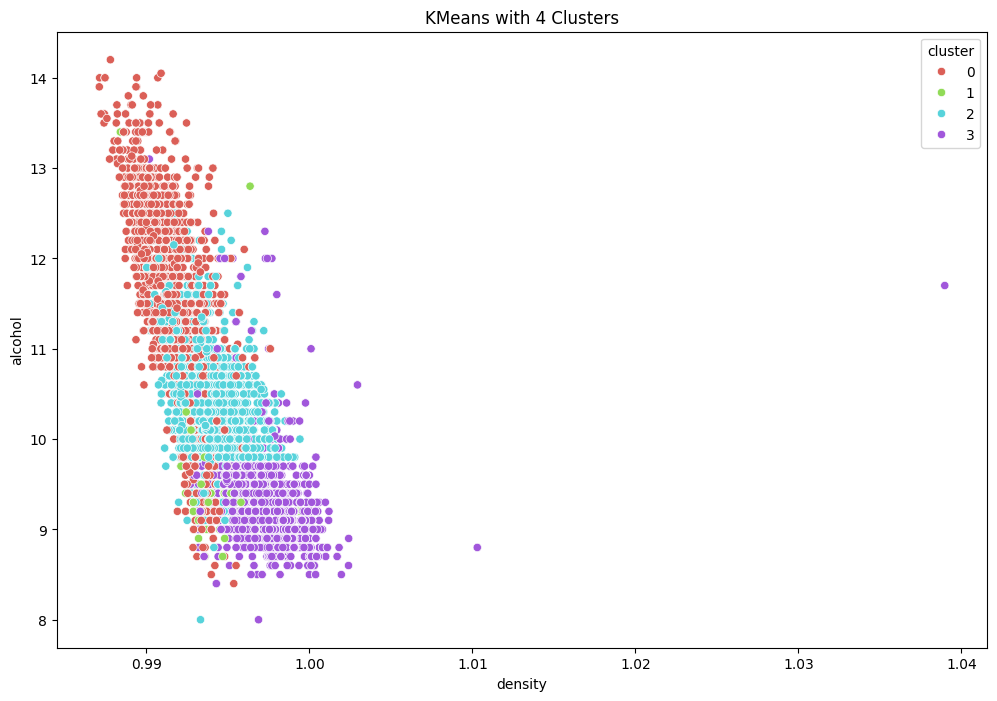

In [63]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='density', y='alcohol', hue='cluster', palette=sns.color_palette('hls', 4))
plt.title('KMeans with 4 Clusters')
plt.show()

In [ ]:
data.columns.values 

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [ ]:
data.quality.unique() 

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [ ]:
data.quality.value_counts() ##quality" has most values concentrated in the categories 5, 6 and 7.
## Only a few observations made for the categories 3 & 9

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [ ]:
# Scale the features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('quality', axis=1))

In [64]:
## clusters
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(data[['density', 'alcohol']])
y_predicted

array([2, 2, 0, ..., 2, 1, 3])

In [65]:
data['clusters'] = y_predicted
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster,clusters
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,3,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,2,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,2,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,3
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,3,2
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,2
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0,1


In [66]:
# Train the KMeans model
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_features)

KMeans(n_clusters=4)

In [67]:
# Predict the cluster for each sample
predicted_clusters = kmeans.predict(scaled_features)

In [68]:
# Add the cluster predictions to the DataFrame
data['cluster'] = predicted_clusters

In [69]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster,clusters
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,2,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,2,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1,3
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,2
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1,2
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,1


In [70]:
## centroid
km.cluster_centers_

array([[ 0.99431853, 10.24028542],
       [ 0.9906154 , 12.51294591],
       [ 0.99669179,  9.22856291],
       [ 0.99229071, 11.22608588]])

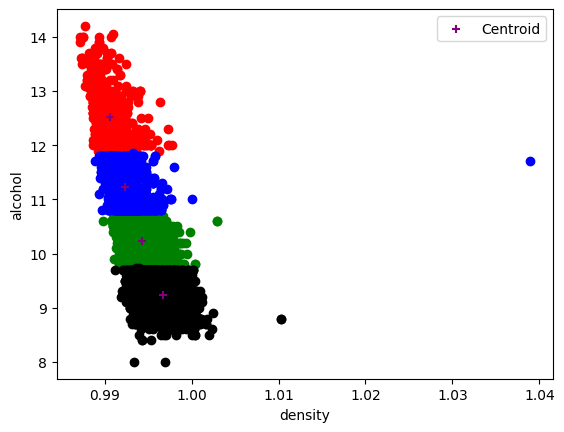

In [71]:
data1 = data[data.clusters==0]
data2 = data[data.clusters==1]
data3 = data[data.clusters==2]
data4 = data[data.clusters==3]

plt.scatter(data1['density'], data1['alcohol'], color = 'green')
plt.scatter(data2['density'], data2['alcohol'], color = 'red')
plt.scatter(data3['density'], data3['alcohol'], color = 'black')
plt.scatter(data4['density'], data4['alcohol'], color = 'blue')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker='+', label = 'Centroid')
plt.xlabel('density')
plt.ylabel('alcohol')
plt.legend()


In [74]:
## model evaluation
print('WCSS: ', km.inertia_)

WCSS:  530.3449941497206


In [ ]:
## normalize
data_norm = normalize(data)
data_norm = pd.DataFrame(data_norm, columns=data.columns)
data_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
0,0.039414,0.001520,0.002027,0.116553,0.000253,0.253376,0.957198,0.005636,0.016892,0.002534,0.049549,0.033783,0.022522
1,0.047207,0.002248,0.002548,0.011989,0.000367,0.104905,0.989109,0.007448,0.024728,0.003672,0.071186,0.044959,0.022480
2,0.078777,0.002723,0.003890,0.067107,0.000486,0.291767,0.943382,0.009678,0.031705,0.004279,0.098228,0.058353,0.000000
3,0.037385,0.001194,0.001662,0.044135,0.000301,0.244043,0.965786,0.005170,0.016564,0.002077,0.051405,0.031154,0.020770
4,0.037385,0.001194,0.001662,0.044135,0.000301,0.244043,0.965786,0.005170,0.016564,0.002077,0.051405,0.031154,0.020770


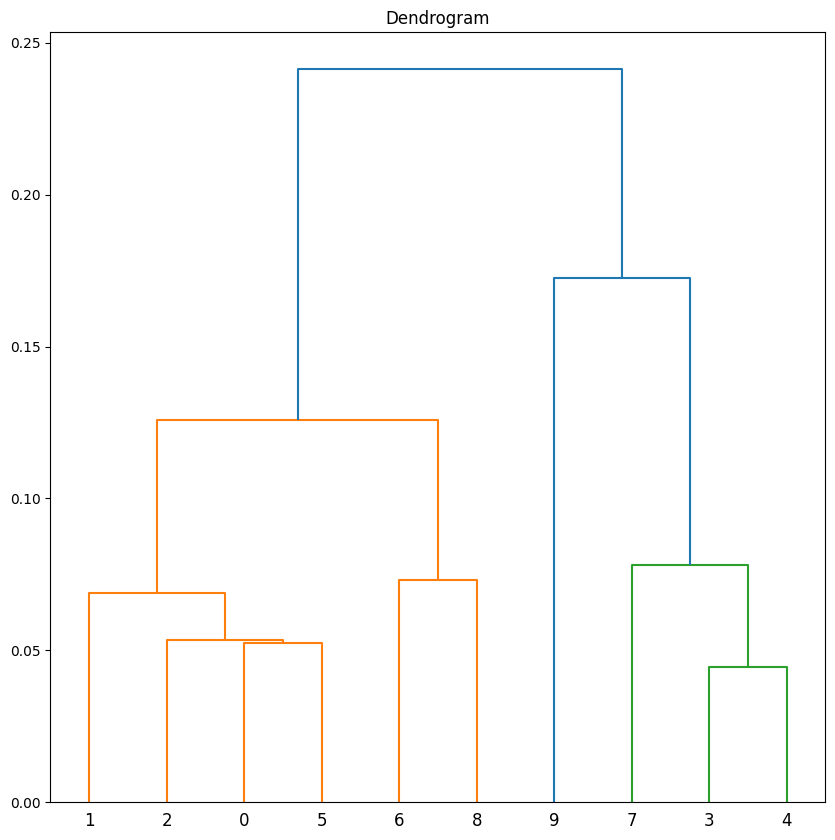

In [ ]:
## dendrogram
subset_data = data_norm.sample(n=10)
plt.figure(figsize=(10,10))
plt.title('Dendrogram')
dend = shc.dendrogram(shc.linkage(subset_data, method='ward'))
plt.show()

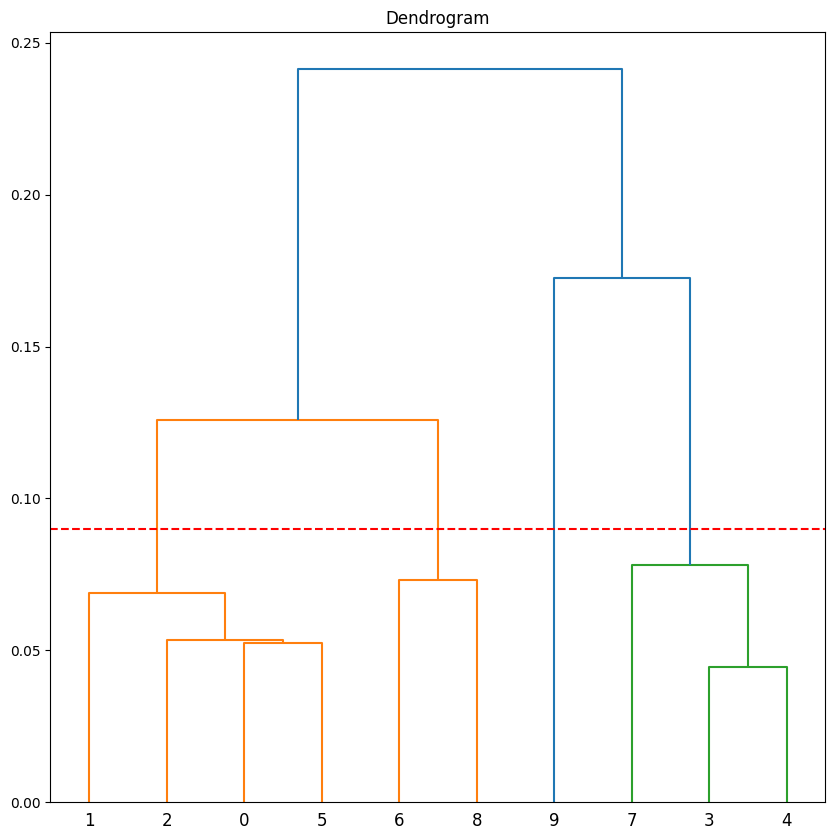

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Dendrogram')
dend = shc.dendrogram(shc.linkage(subset_data, method='ward'))
plt.axhline(y=0.09, color = 'r', linestyle = '--')

In [ ]:
## pca --- dimensionality reduction
pca = PCA(n_components=2)
new_data = pca.fit_transform(data_norm)

In [ ]:
## cluster
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_predicted = cluster.fit_predict(new_data)

C:\Users\Arani C\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
data_norm['clusters'] = y_predicted
data_norm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster,clusters
0,0.039414,0.001520,0.002027,0.116553,0.000253,0.253376,0.957198,0.005636,0.016892,0.002534,0.049549,0.033783,0.022522,0
1,0.047207,0.002248,0.002548,0.011989,0.000367,0.104905,0.989109,0.007448,0.024728,0.003672,0.071186,0.044959,0.022480,1
2,0.078777,0.002723,0.003890,0.067107,0.000486,0.291767,0.943382,0.009678,0.031705,0.004279,0.098228,0.058353,0.000000,0
3,0.037385,0.001194,0.001662,0.044135,0.000301,0.244043,0.965786,0.005170,0.016564,0.002077,0.051405,0.031154,0.020770,0
4,0.037385,0.001194,0.001662,0.044135,0.000301,0.244043,0.965786,0.005170,0.016564,0.002077,0.051405,0.031154,0.020770,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,0.064445,0.002183,0.003014,0.016631,0.000405,0.249466,0.956286,0.010302,0.033990,0.005197,0.116417,0.062367,0.010394,0
4894,0.037055,0.001797,0.002021,0.044915,0.000264,0.320017,0.943209,0.005586,0.017685,0.002583,0.053898,0.028072,0.022457,0
4895,0.056153,0.002073,0.001641,0.010367,0.000354,0.259167,0.958920,0.008574,0.025830,0.003974,0.081206,0.051833,0.000000,0
4896,0.048694,0.002568,0.002656,0.009739,0.000195,0.177069,0.973880,0.008753,0.029571,0.003364,0.113324,0.061974,0.008853,1


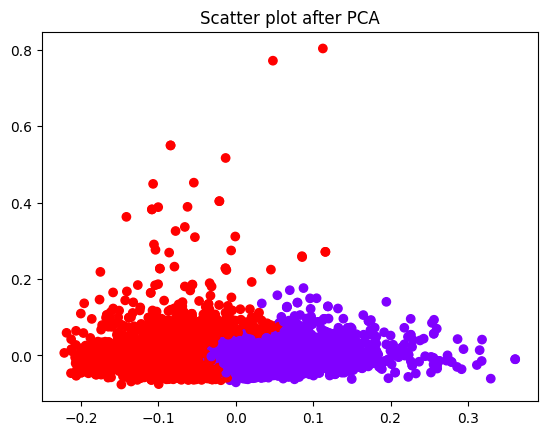

In [ ]:
## scatter plot
plt.scatter(new_data[:,0], new_data[:,1], c=cluster.labels_, cmap='rainbow')
plt.title('Scatter plot after PCA')
plt.show()